In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
start=pd.read_csv("D:\\DATA SCIENCE\ASSIGNMENTS\\50_Startups.csv")

In [4]:
start.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [16]:
start1=start.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

In [17]:
start1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [18]:
start1[start1.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [19]:
start1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Corelation

In [20]:
start1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

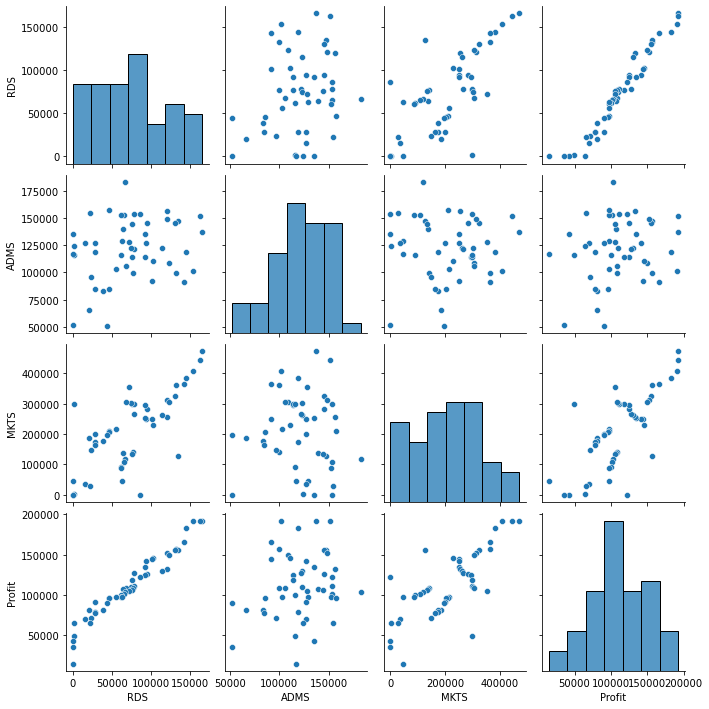

In [21]:
sns.pairplot(start1)

# Preparing a model

In [22]:
model=smf.ols('Profit~RDS+ADMS+MKTS',data=start1).fit()
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [27]:
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [24]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression

In [30]:
ml_a=smf.ols('Profit~ADMS',data = start1).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    3.040044
ADMS         1.419493
dtype: float64 
 Intercept    0.003824
ADMS         0.162217
dtype: float64


In [31]:
ml_m=smf.ols('Profit~MKTS',data=start1).fit()
print(ml_m.tvalues,'\n',ml_m.pvalues)

Intercept    7.808356
MKTS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [32]:
ml_am=smf.ols('Profit~ADMS+MKTS',data=start1).fit()
print(ml_am.tvalues,'\n',ml_am.pvalues)

Intercept    1.142741
ADMS         2.467779
MKTS         8.281039
dtype: float64 
 Intercept    2.589341e-01
ADMS         1.729198e-02
MKTS         9.727245e-11
dtype: float64


# Calculating VIF

In [34]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=start1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=start1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=start1).fit().rsquared
vif_m=1/(1-rsq_m)

d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


# Resudial Analysis

C:\Users\ISHIKA\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


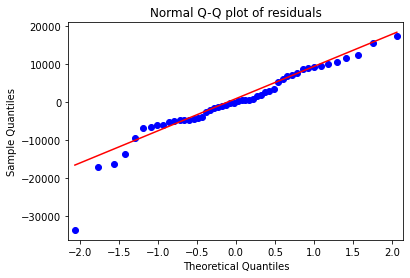

In [35]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [37]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

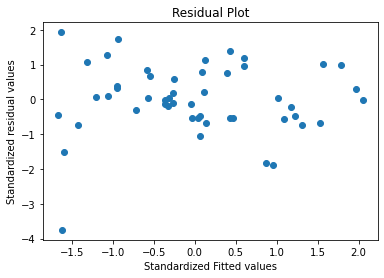

In [38]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

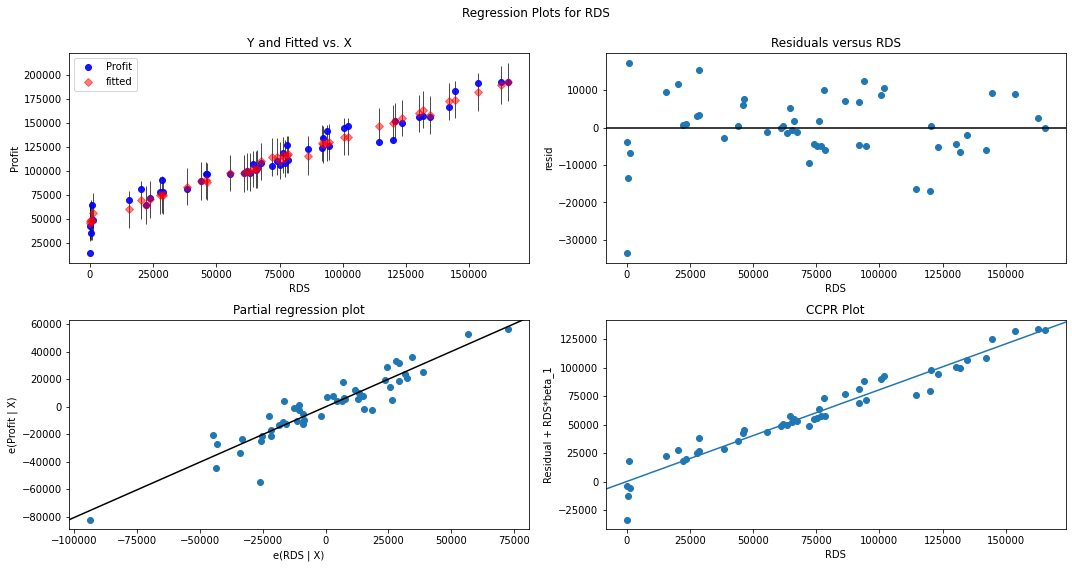

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

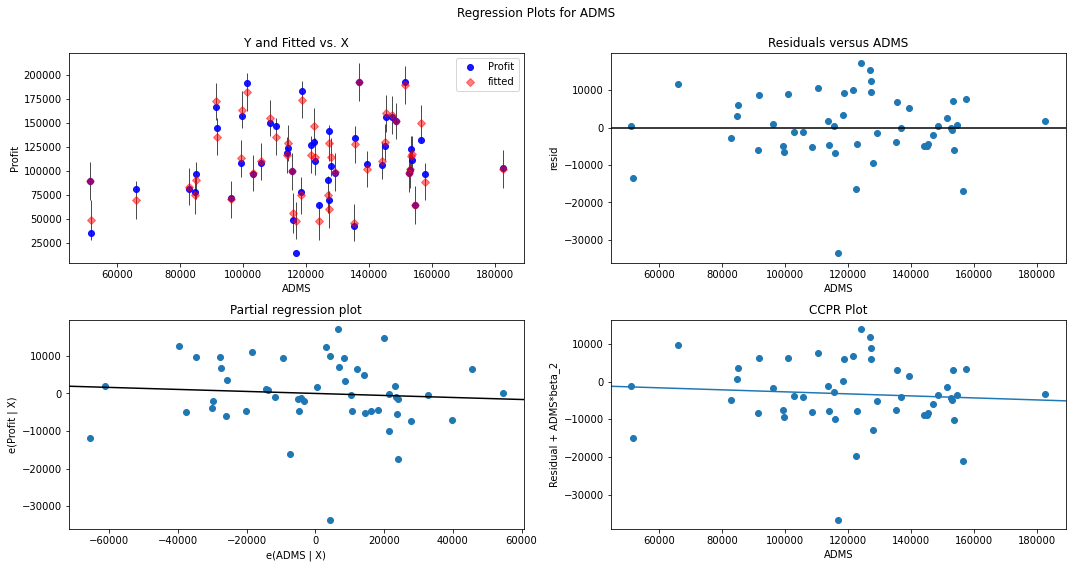

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

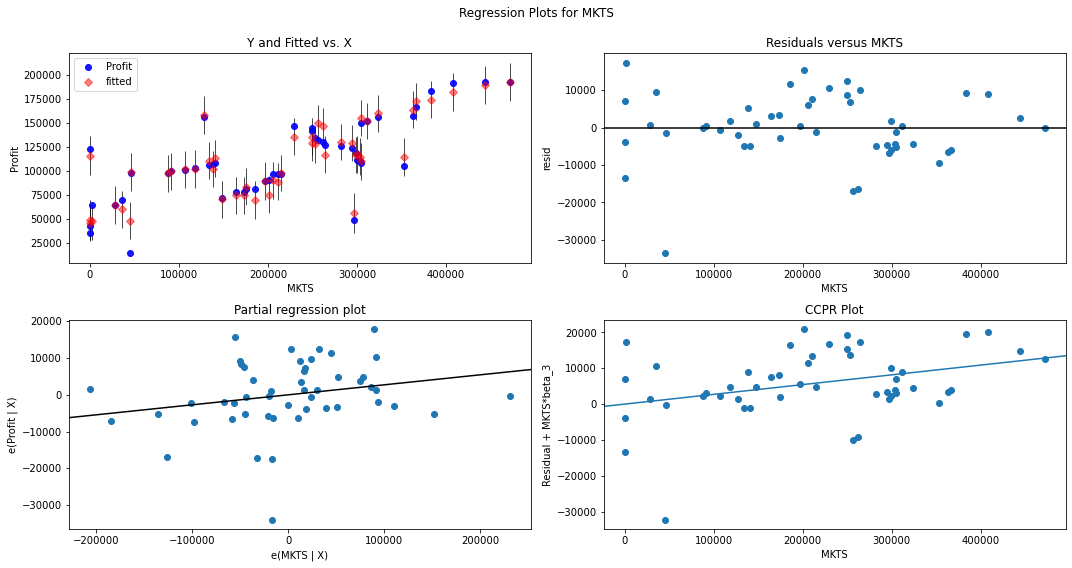

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKTS", fig=fig)
plt.show()

# Cook’s Distance

In [42]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

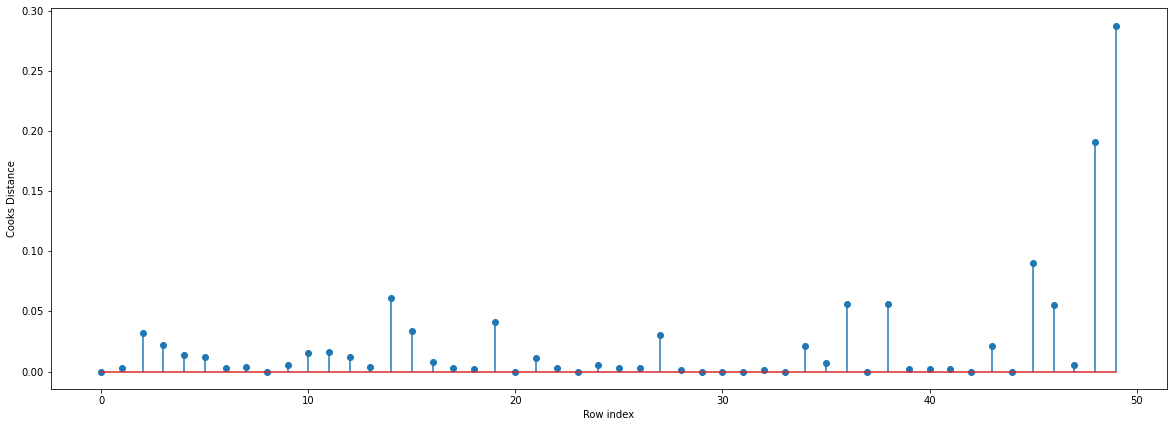

In [45]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(start1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

# High Influence points

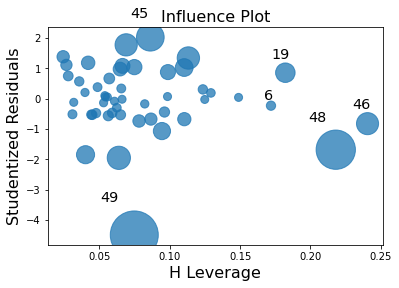

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [48]:
k = start1.shape[1]
n = start1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [49]:
start1[start1.index.isin([49, 48])]

,RDS,ADMS,MKTS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [50]:
start1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [51]:
start=pd.read_csv("D:\\DATA SCIENCE\ASSIGNMENTS\\50_Startups.csv")

In [52]:
start=start1.drop(start.index[[49,48]],axis=0).reset_index()

In [53]:
start=start.drop(['index'],axis=1)
start

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [54]:
final_ml= smf.ols('Profit~RDS+ADMS+MKTS',data = start).fit()

In [58]:
(final_ml.rsquared,final_ml.aic)

(0.9626766170294073, 994.6690439260116)